In [58]:
import dill
import numpy as np
import matplotlib.pyplot as plt

In [59]:
inshallah = np.load(open("big_boi20131.pickle", "rb"), allow_pickle=True)

In [60]:
wtf = np.array([[1,3,5], [1,2,3]])
huh = np.array([[0,2,4], [4,5,7]])
print(wtf + huh)

[[ 1  5  9]
 [ 5  7 10]]


Grid will be from left to right, top to bottom

In [61]:
def blockshaped(arr, nrows, ncols):
    """
    Return an array of shape (n, nrows, ncols) where
    n * nrows * ncols = arr.size

    If arr is a 2D array, the returned array should look like n subblocks with
    each subblock preserving the "physical" layout of arr.
    """
    h, w = arr.shape
    assert h % nrows == 0, f"{h} rows is not evenly divisible by {nrows}"
    assert w % ncols == 0, f"{w} cols is not evenly divisible by {ncols}"
    return (arr.reshape(h//nrows, nrows, -1, ncols)
               .swapaxes(1,2)
               .reshape(-1, nrows, ncols))

In [62]:
grid = blockshaped(inshallah, 100, 100)

Create bloom frequency algorithm

In [63]:
def bloom_frequency(grid_block_1x1):
    grid_block_1x1 = np.ravel(grid_block_1x1)
    non_zero_array = np.nonzero(grid_block_1x1)[0]
    n = non_zero_array.size
    N = 10000
    sum = 0
    for index in non_zero_array:
        sum += grid_block_1x1[index]
    return (n / N) * sum

In [64]:
def stick_it_together(arrays, final_rows, final_cols, block_rows, block_cols):
    # Create a nested list to hold the blocks
    nested_list = []

    # Iterate over the arrays and divide them into rows
    for i in range(0, final_rows, block_rows):
        row_blocks = []
        for j in range(0, final_cols, block_cols):
            block = arrays.pop(0)  # Remove the first array from the list
            row_blocks.append(block)
        nested_list.append(row_blocks)
    return np.block(nested_list)

In [68]:
akbar = [bloom_frequency(i) for i in grid]

AttributeError: 'list' object has no attribute 'shape'

In [65]:
g = stick_it_together([bloom_frequency(i) for i in grid], 180, 360, 1, 1)


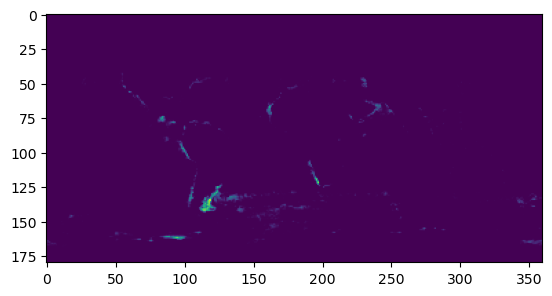

In [66]:
plt.imshow(g)

In [ ]:
from PIL import Image
img = Image.open('testwms.png')
sheebai = np.array(img)

Convert 10km to 1deg